# Baseline Model for Anomaly Detection

In this notebook, we develop the PCA baseline model and evaluate the metrics of anomaly detection.

In [1]:
import warnings
import pandas as pd
from modules.anomaly_detector import AnomalyDetectionKit

# ignore warnings
warnings.filterwarnings('ignore')

In [2]:
# create class of anomaly detection kit
adk = AnomalyDetectionKit()

In [3]:
# load data and drop the probability column
data = pd.read_csv('../0_data/som_studies/normal_operation_compressor.csv')
x = data.drop(['prob'], axis=1)
x.head()

,FCV-501D_ACT,PIT-501D,PIT-516D,PIT-517D,PIT-518D,PIT-519D,PIT-521D,PIT-523D,PIT-529D,PIT-530D,...,XT-506D-X,XT-506D-Y,XT-507D-X,XT-507D-Y,XT-508D-X,XT-508D-Y,ZT-503D-A,ZT-503D-B,ZT-504D-B,ZY-503D
0,45.493362,40.756344,20.902378,17.372452,2.038123,2.224318,0.992395,3.347148,4.506837,5.060158,...,13.370263,11.907991,8.478170,9.437210,6.986217,10.068040,26.280346,26.706827,0.071125,26.317259
1,44.839832,40.872658,20.552832,17.094263,2.000226,2.184674,0.992454,3.304876,4.491679,5.077046,...,13.718800,12.062502,8.429724,9.592444,7.121663,10.251029,26.943079,27.212057,0.071125,26.810747
2,47.116543,40.626442,21.869236,18.119350,2.124781,2.319191,0.991775,3.460335,4.479621,5.148957,...,13.031363,11.878652,8.444281,9.146814,6.753309,9.941579,24.002470,24.779950,0.074429,24.078333
3,47.255856,40.635143,21.998035,18.240286,2.147179,2.343245,0.991836,3.480938,4.429873,5.161973,...,13.584080,12.130912,8.444281,9.146688,6.811512,10.018728,23.825638,24.554980,0.075468,23.965624
4,47.097378,40.642517,21.893854,18.163750,2.138274,2.335860,0.991764,3.471886,4.563508,5.125422,...,13.545857,12.169901,8.458838,9.292214,6.772871,10.038246,23.996452,24.678562,0.071191,24.140740


Parallel Method Results
--------------------------------------------------
Number of PCs retained: 11
Explained Variance: 99.72 %


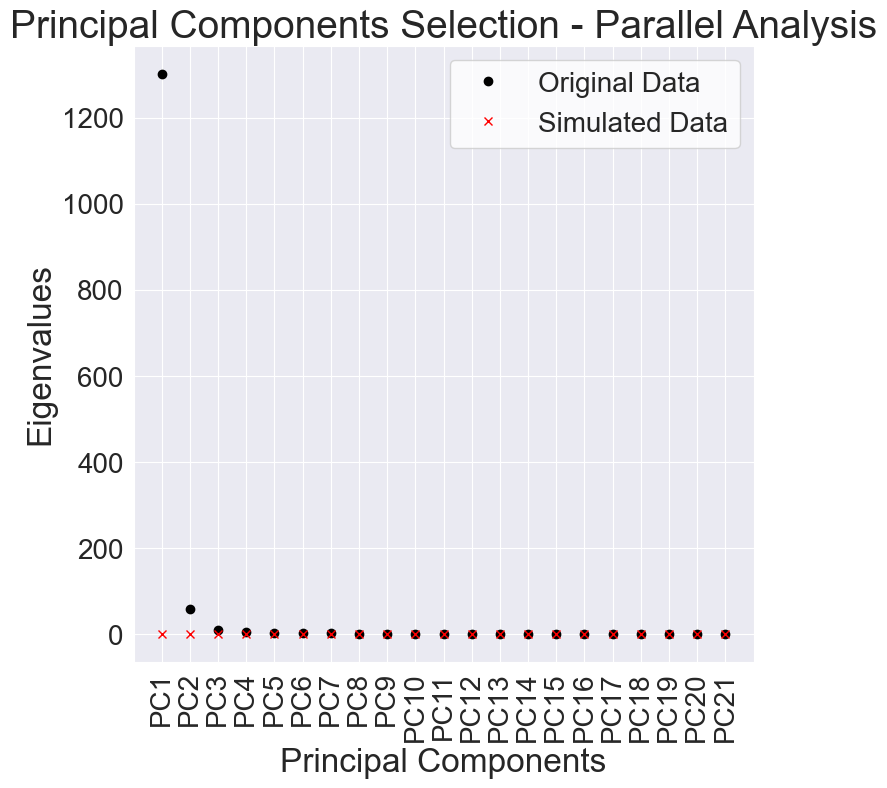

In [4]:
# apply the parallalel method
adk.parallel_analysis(x, plot=True)

- The parallel analysis method selected 11 principal components. However, the scree plot suggests that only three components are sufficient for the elbow.

In [5]:
# fit the final PCA
adk.fit_final(x, n=2)
adk.save_model(adk.final_pca, 'baseline')

Number of PCs changed
--------------------------------------------------
Number of PCs retained: 2
Explained Variance: 98.05 %


In [6]:
# calculate Hotellings T2s and critical value
t2s, tmax = adk.calculate_T2(data=x)
tmax

5.99492125250935